# **Project Name** - Exploratory Data Analysis (EDA) in Telco Customer Churn

### Objective:
To understand customer churn patterns by exploring demographic, service, and usage characteristics in the Telco dataset.

## ***Know the data***

### 1. Import libraries

In [24]:
# 1. Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno  # Optional, for visualizing missing values
from scipy.stats import chi2_contingency
import warnings as wr
wr.filterwarnings('ignore')

### 2. Dataset loading

In [25]:
# 2. Load the dataset

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

### 3. Overview of the Dataset 

In [26]:
# Dataset First Look

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
# Dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [28]:
# Dataset Description

df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [29]:
# Dataset Rows & Columns count

print(f"Number of Rows : {df.shape[0]}")
print(f"Number of Columns : {df.shape[1]}")

Number of Rows : 7043
Number of Columns : 21


In [30]:
# Dataset features names

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### 4. Check for Anomalies in the Dataset

In [31]:
# Missing values

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [32]:
# TotalCharges is object but should be float

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [33]:
# let us check the information of dataset features again after chaning the TotalCharges data type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
# Check the dataset description after chaning the TotalCharges data type

df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<Axes: >

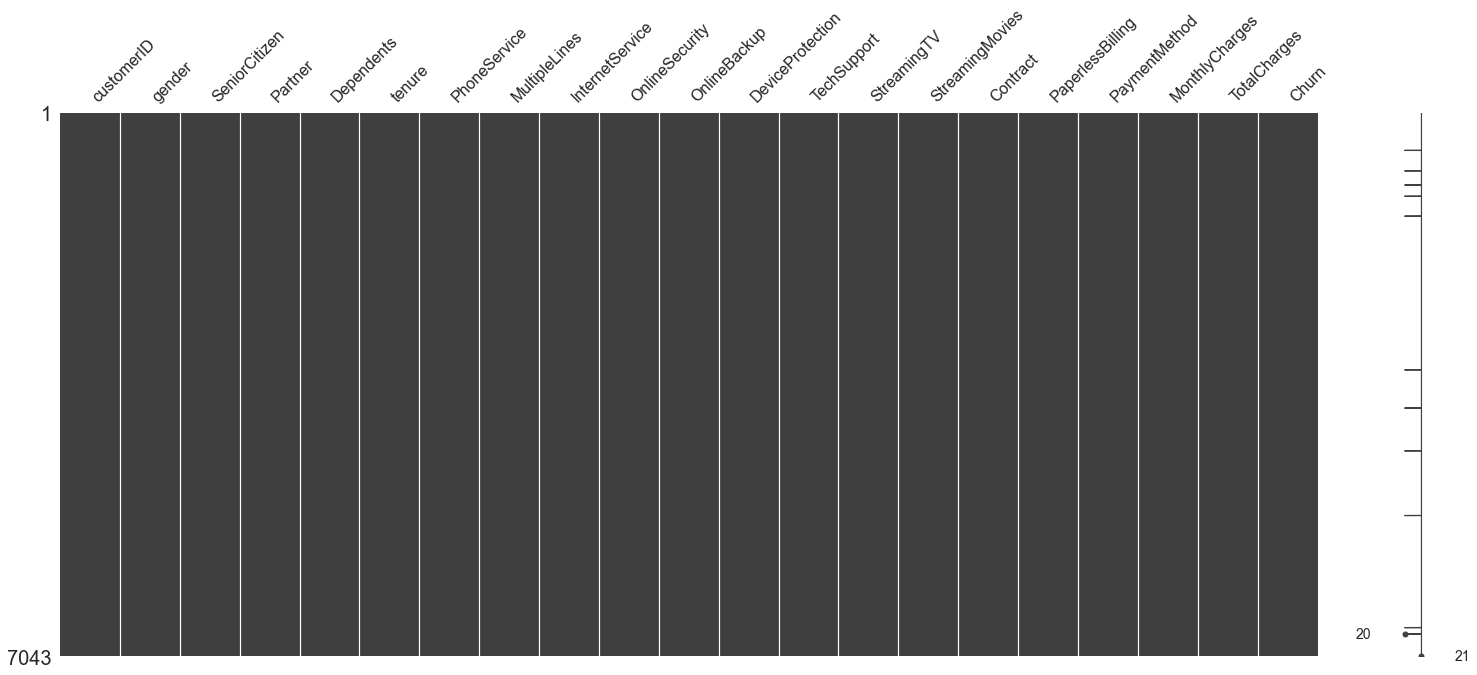

In [35]:
# Visualize missing

msno.matrix(df)

In [36]:
# Duplicates

df.duplicated().sum()

0

<Axes: ylabel='tenure'>

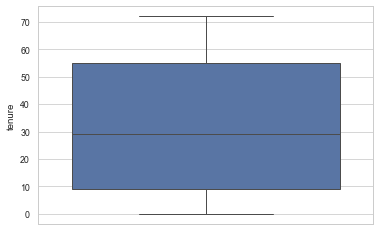

In [37]:
# Outlier detection of tenure

sns.set_theme(style='whitegrid', context ='paper')
sns.boxplot(df['tenure'])

<Axes: xlabel='MonthlyCharges'>

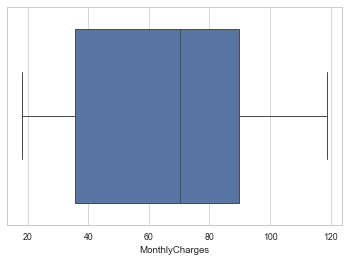

In [38]:
# Outlier detection of Monthly Charges

sns.set_theme(style='whitegrid', context ='paper')
sns.boxplot(x=df['MonthlyCharges'])

<Axes: xlabel='TotalCharges'>

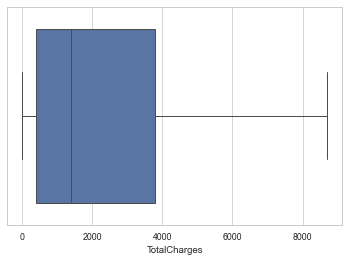

In [39]:
# Outlier detection of Total Charges

sns.set_theme(style='whitegrid', context ='paper')
sns.boxplot(x=df['TotalCharges'])

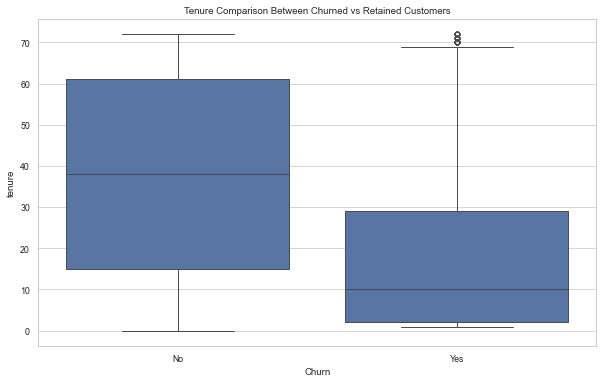

In [40]:
# Compare tenure between churned vs. retained customers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure Comparison Between Churned vs Retained Customers')
plt.show()

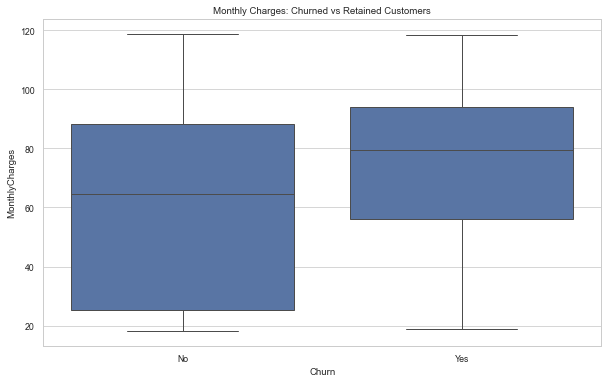

In [41]:
# Compare MonthlyCharges between churned vs. retained customers

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges: Churned vs Retained Customers')
plt.show()

In [42]:
# Show the actual average tenure statistics for churned vs retained,

average_tenure = df.groupby('Churn')['tenure'].mean()
print(average_tenure)

Churn
No     37.569965
Yes    17.979133
Name: tenure, dtype: float64


In [43]:
# Perform a statistical test (t-test) to confirm the significance on tenure

from scipy.stats import ttest_ind

# Split tenures based on Churn status
tenure_churned = df[df['Churn'] == 'Yes']['tenure']
tenure_retained = df[df['Churn'] == 'No']['tenure']

# Perform independent t-test
t_stat, p_value = ttest_ind(tenure_churned, tenure_retained)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.6f}")

# Interpretation
if p_value < 0.05:
    print("✅ The difference in average tenure between churned and retained customers is statistically significant.")
else:
    print("❌ No significant difference detected.")


T-statistic: -31.580
P-value: 0.000000
✅ The difference in average tenure between churned and retained customers is statistically significant.


### 5. Univariate Analysis

<Axes: xlabel='Churn', ylabel='count'>

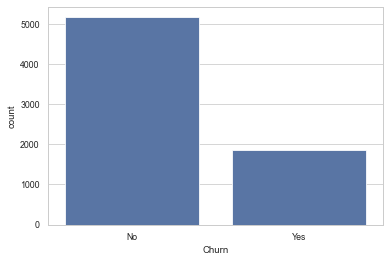

In [44]:
# 5.Univariate Analysis of Categorical feature of target (Churn) variable

sns.countplot(x='Churn', data=df)

In [45]:
# count of unique entries in that column

df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

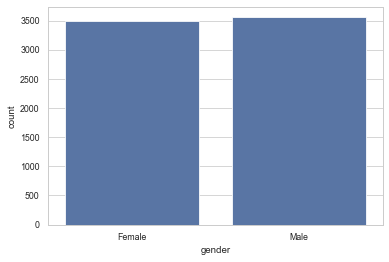

In [46]:


sns.countplot(x='gender', data=df)

In [47]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

<Axes: xlabel='SeniorCitizen', ylabel='count'>

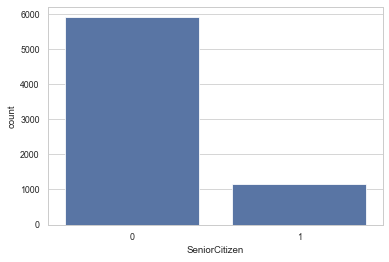

In [48]:
sns.countplot(x='SeniorCitizen', data=df)

In [49]:
df['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

<Axes: xlabel='Partner', ylabel='count'>

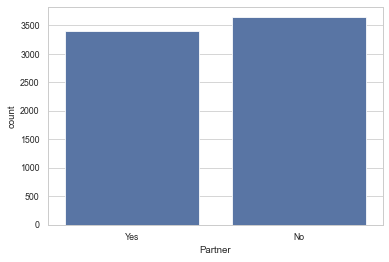

In [50]:
sns.countplot(x='Partner', data=df)

In [51]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

<Axes: xlabel='Dependents', ylabel='count'>

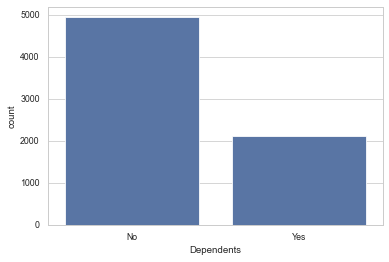

In [52]:
sns.countplot(x='Dependents', data=df)

In [53]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

<Axes: xlabel='PhoneService', ylabel='count'>

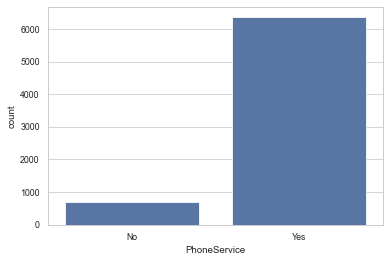

In [54]:
sns.countplot(x='PhoneService', data=df)

In [55]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

<Axes: xlabel='MultipleLines', ylabel='count'>

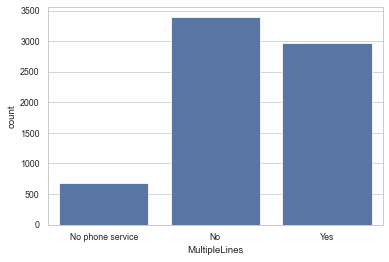

In [56]:
sns.countplot(x='MultipleLines', data=df)

In [57]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

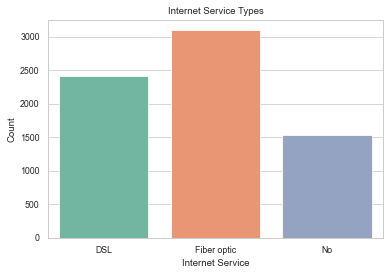

In [58]:
# Count of InternetService

sns.countplot(data=df, x='InternetService', palette='Set2')
plt.title('Internet Service Types')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

In [59]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

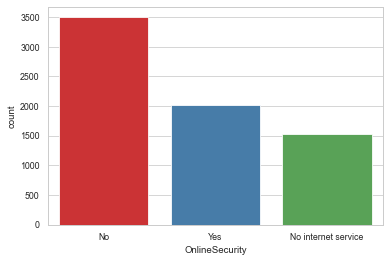

In [60]:
sns.countplot(data=df, x='OnlineSecurity', palette='Set1')
plt.show()

In [61]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

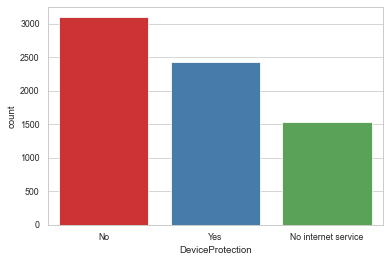

In [62]:
sns.countplot(data=df, x='DeviceProtection', palette='Set1')
plt.show()

In [63]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

<Axes: xlabel='TechSupport', ylabel='count'>

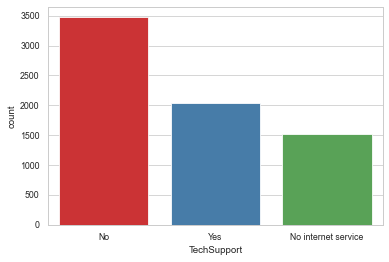

In [64]:
sns.countplot(data=df, x='TechSupport', palette='Set1')

In [65]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

<Axes: xlabel='StreamingTV', ylabel='count'>

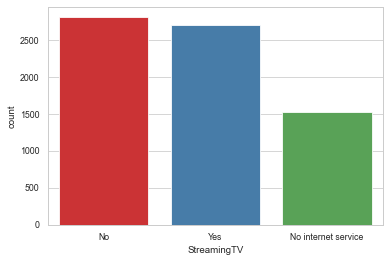

In [66]:
sns.countplot(data=df, x='StreamingTV', palette='Set1')

In [67]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

<Axes: xlabel='StreamingMovies', ylabel='count'>

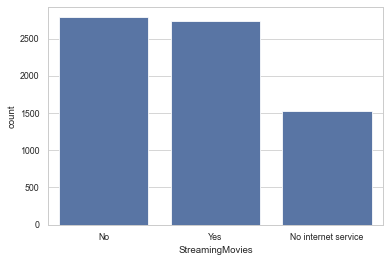

In [68]:
sns.countplot(data=df, x='StreamingMovies')

In [69]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

<Axes: xlabel='Contract', ylabel='count'>

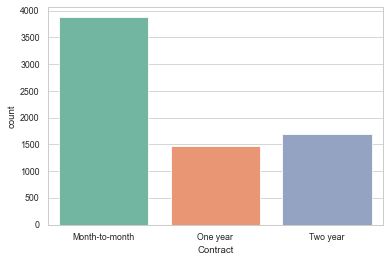

In [70]:
sns.countplot(data=df, x='Contract', palette='Set2')

In [71]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<Axes: xlabel='PaperlessBilling', ylabel='count'>

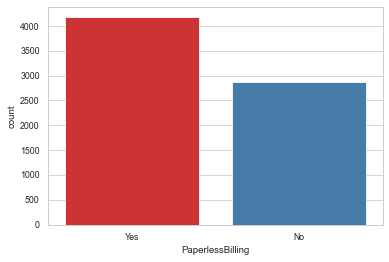

In [72]:
sns.countplot(data=df, x='PaperlessBilling', palette='Set1')

In [73]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

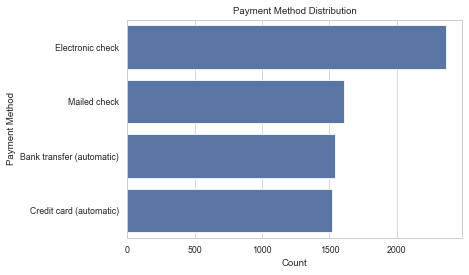

In [74]:
# Count of PaymentMethod

sns.countplot(data=df, y='PaymentMethod', order=df['PaymentMethod'].value_counts().index)
plt.title('Payment Method Distribution')
plt.xlabel('Count')
plt.ylabel('Payment Method')
plt.show()

In [75]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

<Axes: xlabel='tenure', ylabel='Count'>

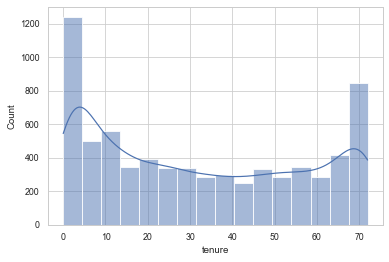

In [76]:
sns.histplot(df['tenure'], kde=True)

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

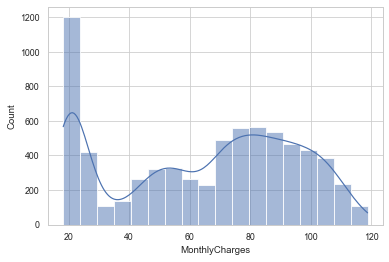

In [77]:
# Numerical

sns.histplot(df['MonthlyCharges'], kde=True)

<Axes: xlabel='TotalCharges', ylabel='Count'>

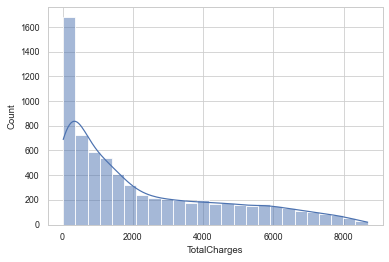

In [78]:
sns.histplot(df['TotalCharges'], kde=True)

### 6. Bivariate Analysis

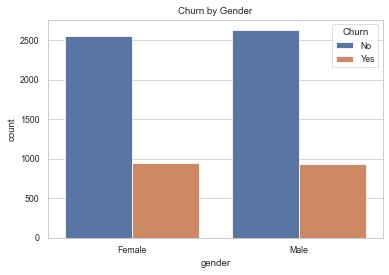

In [79]:
# 6. Bivariate Analysis

# Gender vs. Churn

sns.countplot(data=df, x='gender', hue='Churn')
plt.title('Churn by Gender')
plt.show()

In [80]:
count_table = df.groupby(['gender','Churn']).size().unstack()
count_table_perc = count_table.div(count_table.sum(axis=1), axis=0) * 100

print(count_table)           # Counts
print("\nPercentages:\n", count_table_perc.round(1))

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

Percentages:
 Churn     No   Yes
gender            
Female  73.1  26.9
Male    73.8  26.2


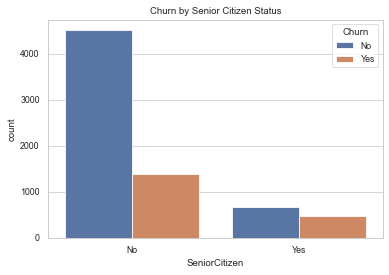

In [81]:
# SeniorCitizen vs Churn

# Although SeniorCitizen is stored as 0/1, it’s a categorical feature:

sns.countplot(data=df, x='SeniorCitizen', hue='Churn')
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Churn by Senior Citizen Status')
plt.show()


In [82]:
count_table = pd.crosstab(df['SeniorCitizen'], df['Churn'])
count_table.index = count_table.index.map({0: 'No', 1: 'Yes'})  # Replace 0/1 with labels

count_table_perc = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100
count_table_perc.index = count_table_perc.index.map({0: 'No', 1: 'Yes'})

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn            No   Yes
SeniorCitizen            
No             4508  1393
Yes             666   476

Percentages:
 Churn            No   Yes
SeniorCitizen            
No             76.4  23.6
Yes            58.3  41.7


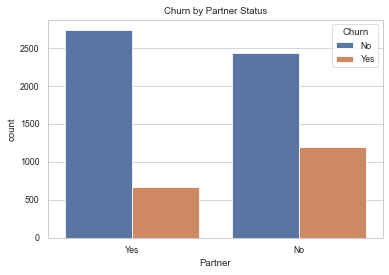

In [83]:
# Partner vs. Churn

sns.countplot(data=df, x='Partner', hue='Churn')
plt.title('Churn by Partner Status')
plt.show()

In [84]:
count_table = pd.crosstab(df['Partner'], df['Churn'])

count_table_perc = pd.crosstab(df['Partner'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn      No   Yes
Partner            
No       2441  1200
Yes      2733   669

Percentages:
 Churn      No   Yes
Partner            
No       67.0  33.0
Yes      80.3  19.7


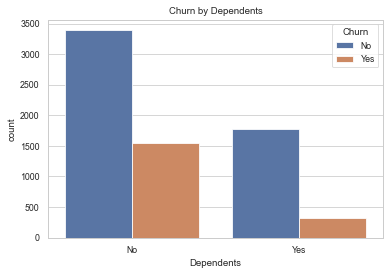

In [85]:
# Dependents vs. Churn

sns.countplot(data=df, x='Dependents', hue='Churn')
plt.title('Churn by Dependents')
plt.show()

In [86]:
count_table = df.groupby(['Dependents','Churn']).size().unstack()
count_table_perc = count_table.div(count_table.sum(axis=1), axis=0) * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn         No   Yes
Dependents            
No          3390  1543
Yes         1784   326

Percentages:
 Churn         No   Yes
Dependents            
No          68.7  31.3
Yes         84.5  15.5


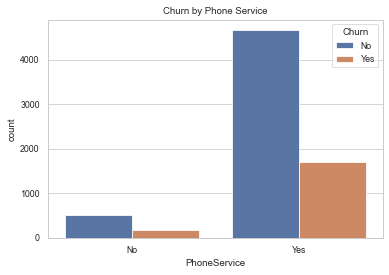

In [87]:
# PhoneService vs. Churn

sns.countplot(data=df, x='PhoneService', hue='Churn')
plt.title('Churn by Phone Service')
plt.show()

In [88]:
count_table = pd.crosstab(df['PhoneService'], df['Churn'])

count_table_perc = pd.crosstab(df['PhoneService'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn           No   Yes
PhoneService            
No             512   170
Yes           4662  1699

Percentages:
 Churn           No   Yes
PhoneService            
No            75.1  24.9
Yes           73.3  26.7


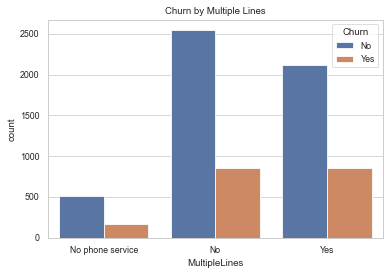

In [89]:
# MultipleLines vs. Churn

sns.countplot(data=df, x='MultipleLines', hue='Churn')
plt.title('Churn by Multiple Lines')
plt.show()

In [90]:
count_table = pd.crosstab(df['MultipleLines'], df['Churn'])

count_table_perc = pd.crosstab(df['MultipleLines'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn               No  Yes
MultipleLines              
No                2541  849
No phone service   512  170
Yes               2121  850

Percentages:
 Churn               No   Yes
MultipleLines               
No                75.0  25.0
No phone service  75.1  24.9
Yes               71.4  28.6


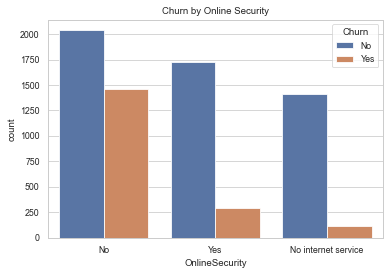

In [91]:
# OnlineSecurity vs. Churn

sns.countplot(data=df, x='OnlineSecurity', hue='Churn')
plt.title('Churn by Online Security')
plt.show()

In [92]:
count_table = pd.crosstab(df['OnlineSecurity'], df['Churn'])

count_table_perc = pd.crosstab(df['OnlineSecurity'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No   Yes
OnlineSecurity                 
No                   2037  1461
No internet service  1413   113
Yes                  1724   295

Percentages:
 Churn                  No   Yes
OnlineSecurity                 
No                   58.2  41.8
No internet service  92.6   7.4
Yes                  85.4  14.6


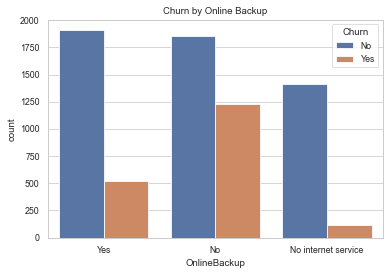

In [93]:
# OnlineBackup vs. Churn

sns.countplot(data=df, x='OnlineBackup', hue='Churn')
plt.title('Churn by Online Backup')
plt.show()

In [94]:
count_table = pd.crosstab(df['OnlineBackup'], df['Churn'])

count_table_perc = pd.crosstab(df['OnlineBackup'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No   Yes
OnlineBackup                   
No                   1855  1233
No internet service  1413   113
Yes                  1906   523

Percentages:
 Churn                  No   Yes
OnlineBackup                   
No                   60.1  39.9
No internet service  92.6   7.4
Yes                  78.5  21.5


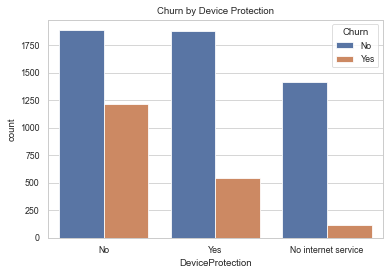

In [95]:
# DeviceProtection vs. Churn

sns.countplot(data=df, x='DeviceProtection', hue='Churn')
plt.title('Churn by Device Protection')
plt.show()

In [96]:
count_table = pd.crosstab(df['DeviceProtection'], df['Churn'])

count_table_perc = pd.crosstab(df['DeviceProtection'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No   Yes
DeviceProtection               
No                   1884  1211
No internet service  1413   113
Yes                  1877   545

Percentages:
 Churn                  No   Yes
DeviceProtection               
No                   60.9  39.1
No internet service  92.6   7.4
Yes                  77.5  22.5


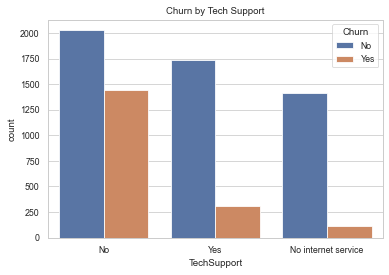

In [97]:
# TechSupport vs. Churn

sns.countplot(data=df, x='TechSupport', hue='Churn')
plt.title('Churn by Tech Support')
plt.show()

In [98]:
count_table = pd.crosstab(df['TechSupport'], df['Churn'])

count_table_perc = pd.crosstab(df['TechSupport'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310

Percentages:
 Churn                  No   Yes
TechSupport                    
No                   58.4  41.6
No internet service  92.6   7.4
Yes                  84.8  15.2


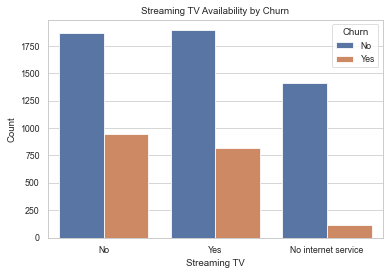

In [99]:
# StreamingTV by Churn

sns.countplot(data=df, x='StreamingTV', hue='Churn')
plt.title('Streaming TV Availability by Churn')
plt.xlabel('Streaming TV')
plt.ylabel('Count')
plt.show()

In [100]:
count_table = pd.crosstab(df['StreamingTV'], df['Churn'])

count_table_perc = pd.crosstab(df['StreamingTV'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No  Yes
StreamingTV                   
No                   1868  942
No internet service  1413  113
Yes                  1893  814

Percentages:
 Churn                  No   Yes
StreamingTV                    
No                   66.5  33.5
No internet service  92.6   7.4
Yes                  69.9  30.1


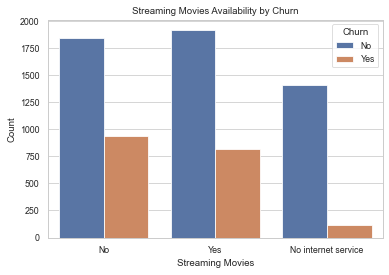

In [101]:
# Streaming Movies by Churn

sns.countplot(data=df, x='StreamingMovies', hue='Churn')
plt.title('Streaming Movies Availability by Churn')
plt.xlabel('Streaming Movies')
plt.ylabel('Count')
plt.show()

In [102]:
count_table = pd.crosstab(df['StreamingMovies'], df['Churn'])

count_table_perc = pd.crosstab(df['StreamingMovies'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                  No  Yes
StreamingMovies               
No                   1847  938
No internet service  1413  113
Yes                  1914  818

Percentages:
 Churn                  No   Yes
StreamingMovies                
No                   66.3  33.7
No internet service  92.6   7.4
Yes                  70.1  29.9


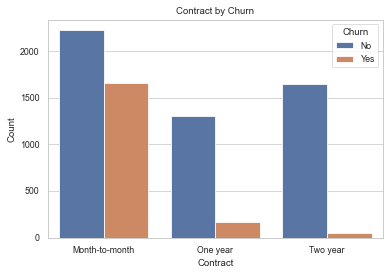

In [103]:
# Contract by Churn

sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Contract by Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

In [104]:
count_table = pd.crosstab(df['Contract'], df['Churn'])

count_table_perc = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48

Percentages:
 Churn             No   Yes
Contract                  
Month-to-month  57.3  42.7
One year        88.7  11.3
Two year        97.2   2.8


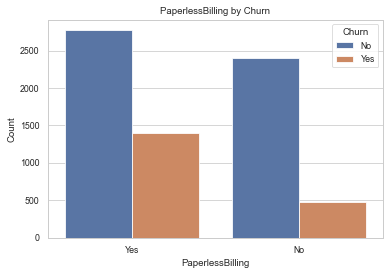

In [105]:
# PaperlessBilling by churn

sns.countplot(data=df, x='PaperlessBilling', hue='Churn')
plt.title('PaperlessBilling by Churn')
plt.xlabel('PaperlessBilling')
plt.ylabel('Count')
plt.show()

In [106]:
count_table = pd.crosstab(df['PaperlessBilling'], df['Churn'])

count_table_perc = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn               No   Yes
PaperlessBilling            
No                2403   469
Yes               2771  1400

Percentages:
 Churn               No   Yes
PaperlessBilling            
No                83.7  16.3
Yes               66.4  33.6


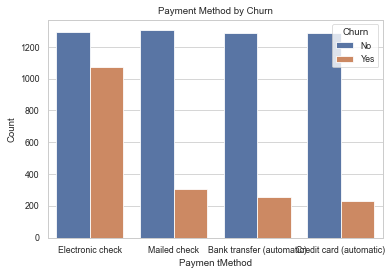

In [107]:
# Payment Method by churn

sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title('Payment Method by Churn')
plt.xlabel('Paymen tMethod')
plt.ylabel('Count')
plt.show()

In [108]:
count_table = pd.crosstab(df['PaymentMethod'], df['Churn'])

count_table_perc = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100

print("Counts:\n", count_table)
print("\nPercentages:\n", count_table_perc.round(1))

Counts:
 Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308

Percentages:
 Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  83.3  16.7
Credit card (automatic)    84.8  15.2
Electronic check           54.7  45.3
Mailed check               80.9  19.1


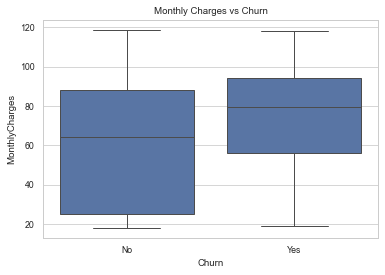

In [109]:
# Numerical vs. Target (Churn)

# MonthlyCharges vs. Churn 

sns.boxplot(data=df, x='Churn', y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

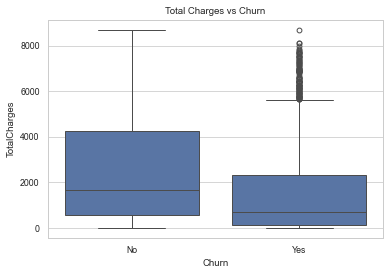

In [110]:
# # Total Charges vs. Churn 

sns.boxplot(data=df, x='Churn', y='TotalCharges')
plt.title('Total Charges vs Churn')
plt.show()

### 7. Multivariate Analysis

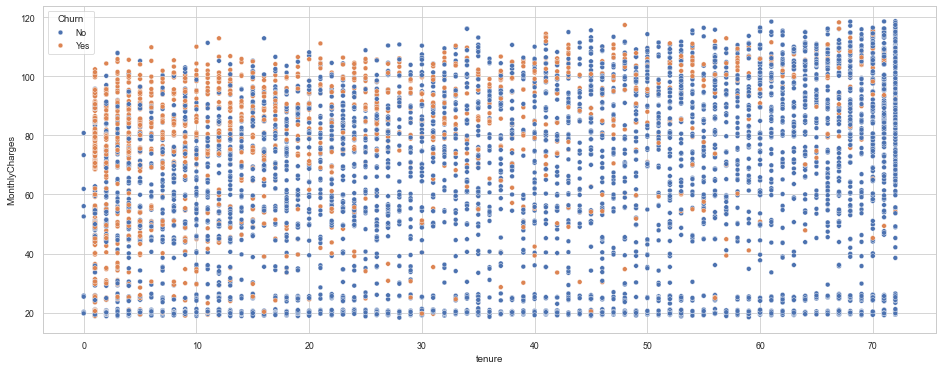

In [111]:
# 7. Multivariate Analysis

# Numerical vs Numerical:
plt.figure(figsize=(16,6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df)
plt.show()

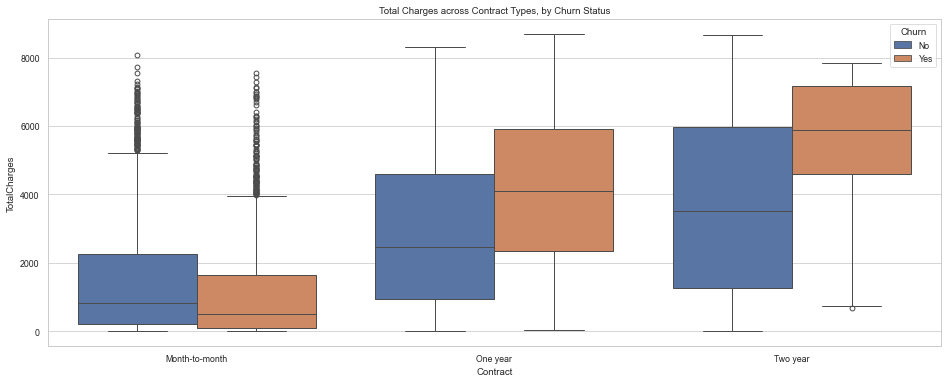

In [112]:
# TotalCharges and Contract and Churn 
# Numerical vs categorical
# This will show how TotalCharges vary across Contract types and how it relates to Churn.

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, x='Contract', y='TotalCharges', hue='Churn')
plt.title('Total Charges across Contract Types, by Churn Status')
plt.show()

In [113]:
# Summary Table – Grouped statistics

summary = df.groupby(['Contract','Churn'])['TotalCharges'].describe()
print(summary)

                       count         mean          std     min        25%  \
Contract       Churn                                                        
Month-to-month No     2220.0  1521.927590  1690.054484   18.85   223.3625   
               Yes    1655.0  1164.460574  1481.646935   18.85    94.2000   
One year       No     1306.0  2903.569908  2196.071516   18.80   938.7250   
               Yes     166.0  4066.212048  2230.122564   28.30  2359.9500   
Two year       No     1637.0  3678.986103  2567.323227   20.35  1269.1000   
               Yes      48.0  5432.363542  2098.707593  692.10  4591.1375   

                           50%        75%      max  
Contract       Churn                                
Month-to-month No      830.525  2251.6625  8061.50  
               Yes     514.000  1649.6500  7548.10  
One year       No     2477.300  4598.0250  8309.55  
               Yes    4098.525  5910.6250  8684.80  
Two year       No     3527.000  5968.4000  8672.45  
            

In [114]:
# Summary Table – Average TotalCharges

avg_totalcharges = df.groupby(['Contract','Churn'])['TotalCharges'].mean().reset_index()
print("\nAverage TotalCharges by Contract and Churn:\n", avg_totalcharges)


Average TotalCharges by Contract and Churn:
          Contract Churn  TotalCharges
0  Month-to-month    No   1521.927590
1  Month-to-month   Yes   1164.460574
2        One year    No   2903.569908
3        One year   Yes   4066.212048
4        Two year    No   3678.986103
5        Two year   Yes   5432.363542


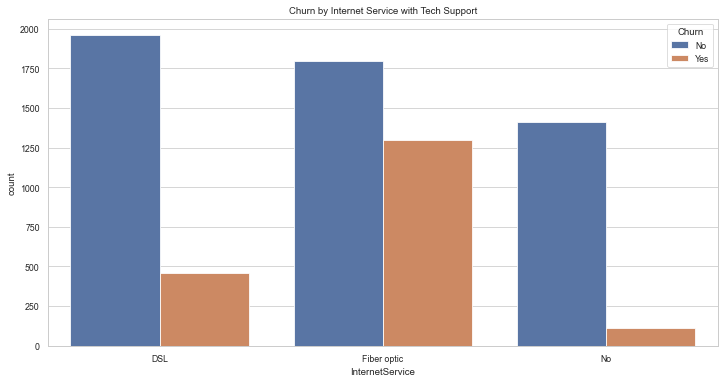

In [115]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='InternetService', hue='Churn', 
              hue_order=['No','Yes'], 
              order=['DSL','Fiber optic','No'])
plt.title('Churn by Internet Service with Tech Support')
plt.show()

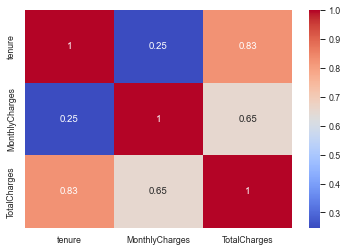

In [116]:
# Correlation Between Tenure, Monthly Charges, and Total Charges

num_data = df[['tenure','MonthlyCharges','TotalCharges']]
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm')
plt.show()

In [117]:
# correlation between the numeric features and the target:


# Create the target binary
df['Churn_binary'] = df['Churn'].map({'No': 0, 'Yes': 1})

# List of numeric columns
num_data = df[['tenure','MonthlyCharges','TotalCharges','Churn_binary']]

# Correlation Matrix
corr_matrix = num_data.corr()

# Show the full table
print("Correlation Matrix:\n", corr_matrix)

# Extract just the correlation of the target
target_corr = corr_matrix['Churn_binary'].sort_values(ascending=False)
print("\nCorrelation of target with features:\n", target_corr)


Correlation Matrix:
                   tenure  MonthlyCharges  TotalCharges  Churn_binary
tenure          1.000000        0.247900      0.825880     -0.352229
MonthlyCharges  0.247900        1.000000      0.651065      0.193356
TotalCharges    0.825880        0.651065      1.000000     -0.199484
Churn_binary   -0.352229        0.193356     -0.199484      1.000000

Correlation of target with features:
 Churn_binary      1.000000
MonthlyCharges    0.193356
TotalCharges     -0.199484
tenure           -0.352229
Name: Churn_binary, dtype: float64
